In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data=pd.read_csv("/content/India_GDP_Data.csv")

In [ ]:
print(data.columns)

Index(['Year', 'GDP_In_Billion_USD', 'Per_Capita_in_USD',
       'Percentage_Growth '],
      dtype='object')


In [ ]:
data.columns = data.columns.str.strip()

# Display the cleaned column names
print("Cleaned Columns:", data.columns)


Cleaned Columns: Index(['Year', 'GDP_In_Billion_USD', 'Per_Capita_in_USD', 'Percentage_Growth'], dtype='object')


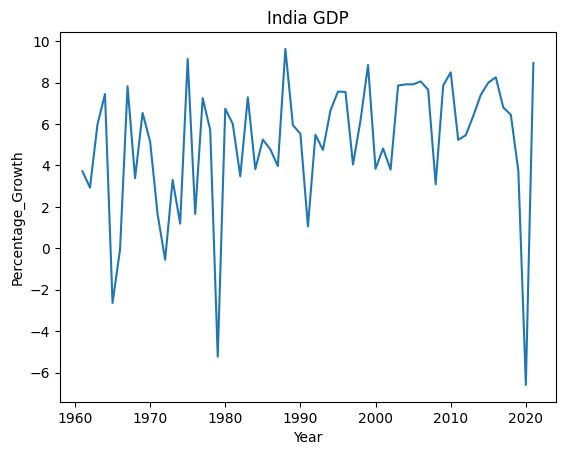

In [ ]:

plt.plot(data['Year'],data['Percentage_Growth'])
plt.xlabel("Year")
plt.ylabel("Percentage_Growth")
plt.title("India GDP")
plt.show()

In [ ]:
#Testing for stationary
from statsmodels.tsa.stattools import adfuller
adf_test= adfuller(data['Percentage_Growth'])
print('ADF stastistic: %f'%adf_test[0])
print('p-value: %f'%adf_test[1])

ADF stastistic: -0.647723
p-value: 0.859830


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Check for infinite values
print(np.isinf(data).sum())


Year                  0
GDP_In_Billion_USD    0
Per_Capita_in_USD     0
Percentage_Growth     0
dtype: int64
Year                  0
GDP_In_Billion_USD    0
Per_Capita_in_USD     0
Percentage_Growth     0
dtype: int64


In [ ]:
# Drop rows with any NaN or infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna()


In [ ]:
data['log_value']=np.log(data['Percentage_Growth'].replace(0,np.nan).dropna())


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
print("missing value if any \n",data['log_value'].isnull().sum())

missing value if any 
 5


In [ ]:
data=data.dropna(subset=['log_value'])

In [ ]:

# Perform ADF test
adf_test = adfuller(data['log_value'])
print('ADF statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])


ADF statistic: -3.825575
p-value: 0.002656


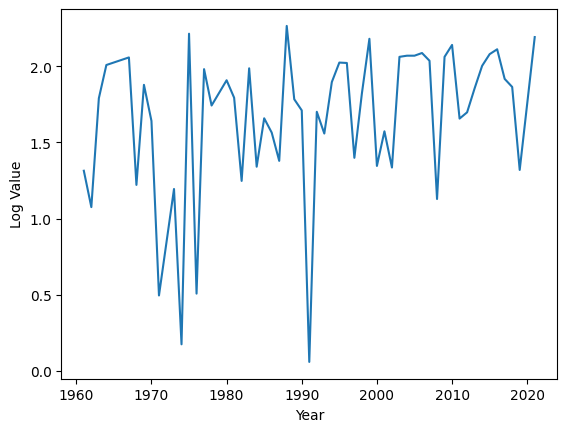

In [ ]:

plt.plot(data['Year'],data['log_value'],label='log-transformed time series')
plt.xlabel('Year')
plt.ylabel('Log Value')
plt.show()

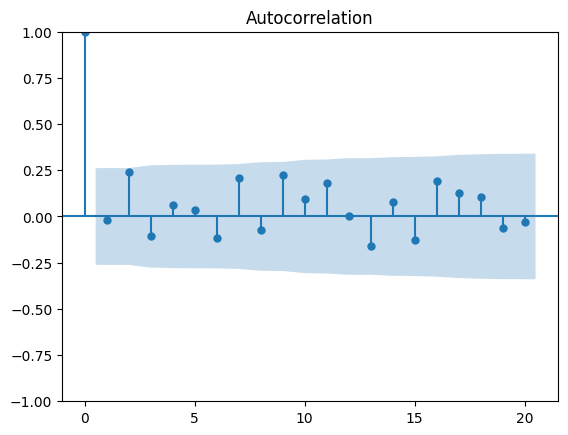

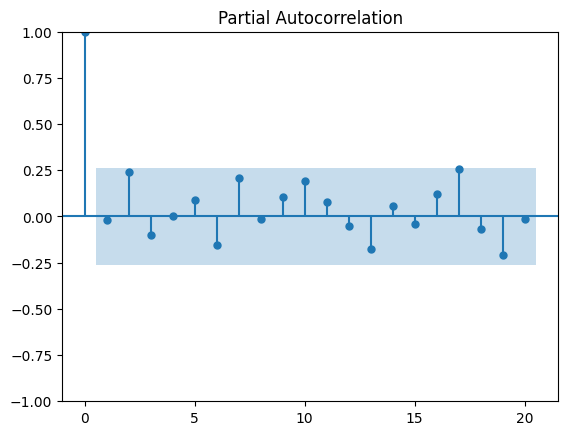

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data['log_value'], lags=20)
plot_pacf(data['log_value'], lags=20)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['log_value'],order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              log_value   No. Observations:                   56
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -39.611
Date:                Fri, 12 Jul 2024   AIC                             85.222
Time:                        04:11:33   BIC                             91.244
Sample:                             0   HQIC                            87.550
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1139      0.164     -0.696      0.487      -0.435       0.207
ma.L1         -0.8993      0.075    -11.995      0.000      -1.046      -0.752
sigma2         0.2390      0.033      7.147      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


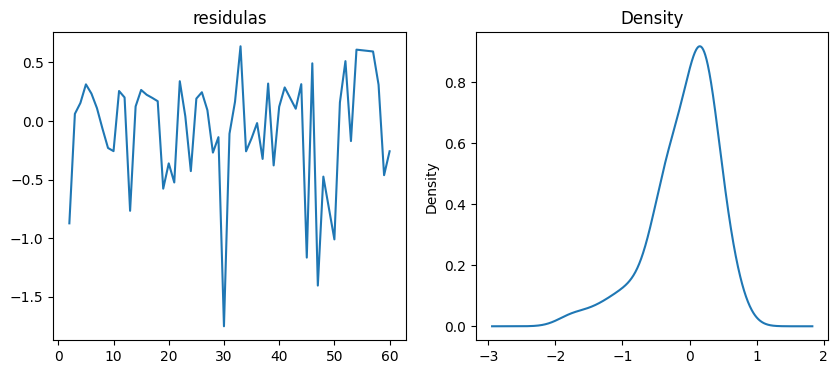

In [ ]:
#make time series predictions
residuals=model_fit.resid[1:]
fig,ax=plt.subplots(1,2,figsize=(10,4))
residuals.plot(title='residulas',ax=ax[0])
residuals.plot(kind='kde',title='Density',ax=ax[1])
plt.show()


In [ ]:
train=int(len(data)*0.8)
train,test=data[0:train],data[train:len(data)]


In [ ]:
model_train=ARIMA(train['log_value'],order=(1,1,1))
model_train_fit=model_train.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
test_forecast=model_train_fit.forecast(len(test))
test_forecast_series=pd.Series(test_forecast,index=test.index)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
test['log_value'] = test['log_value'].fillna(0)
test_forecast_series = test_forecast_series.fillna(0)

<ipython-input-27-09cd6dec8161>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['log_value'] = test['log_value'].fillna(0)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mse=mean_squared_error(test['log_value'],test_forecast_series)
rmse=mse**0.5
print(rmse)

1.0945674333768365


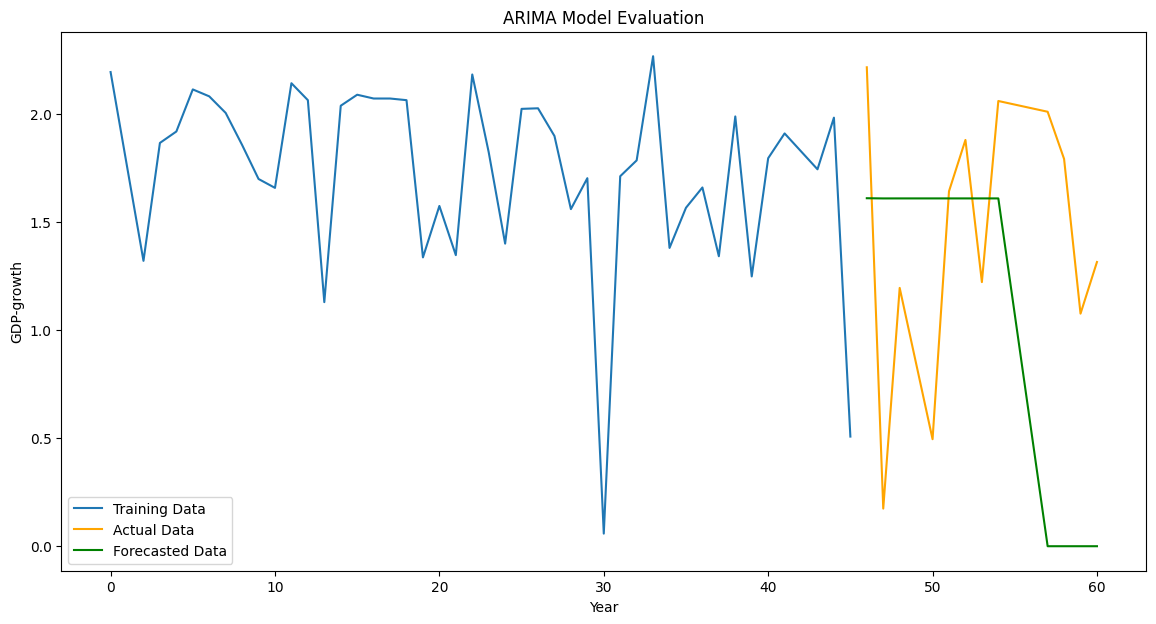

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(train['log_value'], label='Training Data')
plt.plot(test['log_value'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')

plt.title('ARIMA Model Evaluation')
plt.xlabel('Year')
plt.ylabel('GDP-growth')
plt.legend()
plt.show()
